# Messi vs Ronaldo - An Analytical Debate

## Flow of the Webinar:
1. Get data from [Understat](https://understat.com/) for Messi and Ronaldo
3. Data Cleaning and Exploration of the data for Messi and Ronaldo on different aspects
2. Comparative Analysis
3. Shot Analysis
3. The Final comparison

In [15]:
# Import required libraries:
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from sklearn.preprocessing import MinMaxScaler

# Import plotting libraries:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.patches import Arc
from plotly.subplots import make_subplots

# Get that Data!

## Cristiano Ronaldo

### Season-wise data

In [16]:
# Scrape Cristiano player stats:
cris_scrape_url = "https://understat.com/player/2371"
page_connect = urlopen(cris_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

cris_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
cris_season_wise_meta_df.insert(0, "Player", "Cristiano")

In [17]:
cris_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,Sub,10,1,25,517,2.1407179944217205,0,0.3078578971326351,6,2022,Manchester United,2,0,1,2.1407179944217205,2.957992848008871,0.9433596841990948
1,Cristiano,FW,30,18,110,2468,17.212831899523735,3,4.424962695688009,26,2021,Manchester United,8,0,15,14.929328348487616,23.253704860806465,7.720637893304229
2,Cristiano,Sub,1,0,1,28,0.20496900379657745,0,0.03537699952721596,1,2021,Juventus,1,0,0,0.20496900379657745,0.05131009966135025,0.015933100134134293
3,Cristiano,FW,33,29,167,2807,29.838080540299416,3,3.854639131575823,36,2020,Juventus,3,0,23,23.747807636857033,28.635408580303192,8.915713196620345
4,Cristiano,FWL,33,31,208,2920,29.431685788556933,5,6.067226376384497,51,2019,Juventus,3,0,19,19.534961802884936,26.553606890141964,7.224641811102629
5,Cristiano,FW,31,21,175,2692,23.324054691940546,8,5.193874748423696,48,2018,Juventus,3,0,16,18.756297651678324,21.854163620620966,7.177340604364872
6,Cristiano,FW,27,26,178,2304,26.999309986829758,5,5.524839024990797,40,2017,Real Madrid,1,0,23,24.026196867227554,31.62383684515953,9.471848987042904
7,Cristiano,FWL,29,25,162,2546,25.413731053471565,6,4.59103300049901,31,2016,Real Madrid,4,0,19,19.467632994055748,29.57457485795021,8.661090549081564
8,Cristiano,AML,36,35,227,3186,35.588996052742004,11,8.606400065124035,51,2015,Real Madrid,3,0,29,28.899506971240044,40.81803520023823,9.863002741709352
9,Cristiano,FWL,35,48,225,3103,39.30874598119408,16,13.600629400461912,76,2014,Real Madrid,5,1,38,30.38968110177666,43.60805014614016,7.520235439762473


### Shots Data

In [18]:
# Scrape Cristiano shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

cris_shots_df = pd.json_normalize(json.loads(json_data))
cris_shots_df.insert(0, "Player", "Cristiano")

In [19]:
cris_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,...,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659500300884247,Cristiano Ronaldo,h,2371,...,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.0309091005474329,Cristiano Ronaldo,h,2371,...,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334299981594086,Cristiano Ronaldo,h,2371,...,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.020822899416089058,Cristiano Ronaldo,h,2371,...,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432780265808105,Cristiano Ronaldo,h,2371,...,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,Cristiano,497355,62,BlockedShot,0.8159999847412109,0.38799999237060545,0.06472180038690567,Cristiano Ronaldo,h,2371,...,2022,RightFoot,18340,Manchester United,West Ham,1,0,2022-10-30 16:15:00,Scott McTominay,LayOff
1474,Cristiano,497358,73,BlockedShot,0.7230000305175781,0.6419999694824219,0.0203901007771492,Cristiano Ronaldo,h,2371,...,2022,RightFoot,18340,Manchester United,West Ham,1,0,2022-10-30 16:15:00,Luke Shaw,Pass
1475,Cristiano,498586,33,SavedShot,0.91,0.40299999237060546,0.30180200934410095,Cristiano Ronaldo,a,2371,...,2022,Head,18342,Aston Villa,Manchester United,3,1,2022-11-06 14:00:00,None,None
1476,Cristiano,498592,52,MissedShots,0.78,0.35,0.025649599730968475,Cristiano Ronaldo,a,2371,...,2022,RightFoot,18342,Aston Villa,Manchester United,3,1,2022-11-06 14:00:00,Donny van de Beek,LayOff


## Messi

### Season-wise data

In [20]:
# Scrape Messi player stats:
messi_scrape_url = "https://understat.com/player/2097"
page_connect = urlopen(messi_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
messi_season_wise_meta_df.insert(0, "Player", "Messi")

In [21]:
messi_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Messi,FW,32,16,129,2855,17.663388540036976,16,15.239965826272964,93,2022,Paris Saint Germain,0,0,16,17.663388540036976,39.00348609033972,15.89331340789795
1,Messi,Sub,26,6,89,2155,9.880364246666431,13,8.68060227110982,63,2021,Paris Saint Germain,0,0,6,9.880364246666431,27.21941590309143,13.841111708432436
2,Messi,FW,35,30,195,3017,26.676853142678738,9,11.422849107533693,77,2020,Barcelona,4,0,27,22.960455916821957,37.906861275434494,20.33736425638199
3,Messi,Sub,33,25,159,2876,20.849658865481615,20,16.593371644616127,88,2019,Barcelona,4,0,20,17.133270878344774,34.92347752302885,13.537661855109036
4,Messi,FW,34,36,170,2704,25.997147038578987,13,15.335163585841656,93,2018,Barcelona,3,0,32,22.280887201428413,38.45986612141132,10.698799947276711
5,Messi,FW,36,34,196,2995,28.946291390806437,12,15.100405801087618,87,2017,Barcelona,3,0,32,25.973176393657923,48.18063086271286,21.63439449854195
6,Messi,FWR,34,37,179,2832,26.88517417013645,9,13.955131754279137,79,2016,Barcelona,6,0,31,21.682235166430473,42.52503406256437,18.133511958643794
7,Messi,FWR,33,26,158,2726,27.101924054324627,16,15.871267452836037,77,2015,Barcelona,3,0,23,21.899361960589886,41.996870920062065,15.196359729394317
8,Messi,FW,38,43,187,3374,35.89176997169852,18,17.61194877512753,95,2014,Barcelona,4,0,38,31.432101871818304,54.75358371436596,19.756728649139404


### Shots Data

In [22]:
# Scrape Messi shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_shots_df = pd.json_normalize(json.loads(json_data))
messi_shots_df.insert(0, "Player", "Messi")

In [23]:
messi_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,...,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Messi,32522,22,MissedShots,0.7859999847412109,0.52,0.03867039829492569,Lionel Messi,h,2097,...,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Rafinha,Pass
1,Messi,32525,41,Goal,0.8619999694824219,0.615,0.06870149821043015,Lionel Messi,h,2097,...,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Sergio Busquets,BallRecovery
2,Messi,32529,62,Goal,0.86,0.435,0.15034300088882446,Lionel Messi,h,2097,...,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,None,TakeOn
3,Messi,32769,3,SavedShot,0.8180000305175781,0.38,0.04550329968333244,Lionel Messi,a,2097,...,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Pedro,Pass
4,Messi,32773,27,SavedShot,0.8690000152587891,0.19200000762939454,0.06531669944524765,Lionel Messi,a,2097,...,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,Messi,530693,30,MissedShots,0.799000015258789,0.4370000076293945,0.05781928822398186,Lionel Messi,h,2097,...,2022,LeftFoot,20024,Paris Saint Germain,Clermont Foot,2,3,2023-06-03 17:00:00,Vitinha,Pass
1458,Messi,530698,41,MissedShots,0.759000015258789,0.3579999923706055,0.05961775407195091,Lionel Messi,h,2097,...,2022,LeftFoot,20024,Paris Saint Germain,Clermont Foot,2,3,2023-06-03 17:00:00,None,Standard
1459,Messi,530703,53,MissedShots,0.874000015258789,0.3920000076293945,0.36908721923828125,Lionel Messi,h,2097,...,2022,LeftFoot,20024,Paris Saint Germain,Clermont Foot,2,3,2023-06-03 17:00:00,Kylian Mbappe-Lottin,Pass
1460,Messi,530706,58,SavedShot,0.8530000305175781,0.700999984741211,0.0551636777818203,Lionel Messi,h,2097,...,2022,LeftFoot,20024,Paris Saint Germain,Clermont Foot,2,3,2023-06-03 17:00:00,Kylian Mbappe-Lottin,TakeOn


## Build Final Season-level and shots data

### Joint Season-wise Data

In [24]:
season_wise_meta_df = cris_season_wise_meta_df._append(messi_season_wise_meta_df)
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,Sub,10,1,25,517,2.1407179944217205,0,0.3078578971326351,6,2022,Manchester United,2,0,1,2.1407179944217205,2.957992848008871,0.9433596841990948
1,Cristiano,FW,30,18,110,2468,17.212831899523735,3,4.424962695688009,26,2021,Manchester United,8,0,15,14.929328348487616,23.253704860806465,7.720637893304229
2,Cristiano,Sub,1,0,1,28,0.20496900379657745,0,0.03537699952721596,1,2021,Juventus,1,0,0,0.20496900379657745,0.05131009966135025,0.015933100134134293
3,Cristiano,FW,33,29,167,2807,29.838080540299416,3,3.854639131575823,36,2020,Juventus,3,0,23,23.747807636857033,28.635408580303192,8.915713196620345
4,Cristiano,FWL,33,31,208,2920,29.431685788556933,5,6.067226376384497,51,2019,Juventus,3,0,19,19.534961802884936,26.553606890141964,7.224641811102629
5,Cristiano,FW,31,21,175,2692,23.324054691940546,8,5.193874748423696,48,2018,Juventus,3,0,16,18.756297651678324,21.854163620620966,7.177340604364872
6,Cristiano,FW,27,26,178,2304,26.999309986829758,5,5.524839024990797,40,2017,Real Madrid,1,0,23,24.026196867227554,31.62383684515953,9.471848987042904
7,Cristiano,FWL,29,25,162,2546,25.413731053471565,6,4.59103300049901,31,2016,Real Madrid,4,0,19,19.467632994055748,29.57457485795021,8.661090549081564
8,Cristiano,AML,36,35,227,3186,35.588996052742004,11,8.606400065124035,51,2015,Real Madrid,3,0,29,28.899506971240044,40.81803520023823,9.863002741709352
9,Cristiano,FWL,35,48,225,3103,39.30874598119408,16,13.600629400461912,76,2014,Real Madrid,5,1,38,30.38968110177666,43.60805014614016,7.520235439762473


### Joint Shots Data

In [25]:
shots_df = cris_shots_df._append(messi_shots_df)
shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,...,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659500300884247,Cristiano Ronaldo,h,2371,...,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.0309091005474329,Cristiano Ronaldo,h,2371,...,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334299981594086,Cristiano Ronaldo,h,2371,...,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.020822899416089058,Cristiano Ronaldo,h,2371,...,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432780265808105,Cristiano Ronaldo,h,2371,...,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,Messi,530693,30,MissedShots,0.799000015258789,0.4370000076293945,0.05781928822398186,Lionel Messi,h,2097,...,2022,LeftFoot,20024,Paris Saint Germain,Clermont Foot,2,3,2023-06-03 17:00:00,Vitinha,Pass
1458,Messi,530698,41,MissedShots,0.759000015258789,0.3579999923706055,0.05961775407195091,Lionel Messi,h,2097,...,2022,LeftFoot,20024,Paris Saint Germain,Clermont Foot,2,3,2023-06-03 17:00:00,None,Standard
1459,Messi,530703,53,MissedShots,0.874000015258789,0.3920000076293945,0.36908721923828125,Lionel Messi,h,2097,...,2022,LeftFoot,20024,Paris Saint Germain,Clermont Foot,2,3,2023-06-03 17:00:00,Kylian Mbappe-Lottin,Pass
1460,Messi,530706,58,SavedShot,0.8530000305175781,0.700999984741211,0.0551636777818203,Lionel Messi,h,2097,...,2022,LeftFoot,20024,Paris Saint Germain,Clermont Foot,2,3,2023-06-03 17:00:00,Kylian Mbappe-Lottin,TakeOn


In [26]:
shots_df.describe()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,...,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
count,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940,...,2940,2940,2940,2940,2940,2940,2940,2940,2056,2940
unique,2,2940,97,5,311,524,2839,2,2,2,...,9,4,552,85,95,11,9,547,139,22
top,Cristiano,32535,50,MissedShots,0.885,0.5,0.7432780265808105,Cristiano Ronaldo,h,2371,...,2014,LeftFoot,1451,Barcelona,Barcelona,1,1,2015-05-17 18:00:00,Neymar,Pass
freq,1478,1,45,863,118,114,67,1478,1659,1478,...,412,1601,14,720,566,737,922,16,128,1188


# Data Cleaning and EDA

## On Season-wise data

### Numerical EDA

In [27]:
season_wise_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0 to 8
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      19 non-null     object
 1   position    19 non-null     object
 2   games       19 non-null     object
 3   goals       19 non-null     object
 4   shots       19 non-null     object
 5   time        19 non-null     object
 6   xG          19 non-null     object
 7   assists     19 non-null     object
 8   xA          19 non-null     object
 9   key_passes  19 non-null     object
 10  season      19 non-null     object
 11  team        19 non-null     object
 12  yellow      19 non-null     object
 13  red         19 non-null     object
 14  npg         19 non-null     object
 15  npxG        19 non-null     object
 16  xGChain     19 non-null     object
 17  xGBuildup   19 non-null     object
dtypes: object(18)
memory usage: 3.4+ KB


In [28]:
season_wise_meta_df = season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

In [29]:
season_wise_meta_df = season_wise_meta_df.round(2)

In [30]:
season_wise_meta_df.describe().round(1)

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
count,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
mean,29.8,25.6,154.7,2531.8,23.6,9.6,9.6,58.8,2018.2,3.2,0.1,21.5,19.6,32.3,11.4
std,9.2,13.1,60.9,852.2,10.5,6.1,5.8,29.6,2.7,2.0,0.2,11.0,8.4,13.8,6.1
min,1.0,0.0,1.0,28.0,0.2,0.0,0.0,1.0,2014.0,0.0,0.0,0.0,0.2,0.0,0.0
25%,29.5,19.5,143.5,2507.0,19.3,5.0,4.9,38.0,2016.0,2.5,0.0,16.0,17.4,26.9,7.6
50%,33.0,26.0,170.0,2807.0,26.7,9.0,8.7,63.0,2018.0,3.0,0.0,23.0,21.7,34.9,9.9
75%,34.5,34.5,191.0,2957.5,29.2,14.5,15.2,83.0,2020.5,4.0,0.0,30.0,23.9,41.4,15.5
max,38.0,48.0,227.0,3374.0,39.3,20.0,17.6,95.0,2022.0,8.0,1.0,38.0,31.4,54.8,21.6


In [31]:
season_wise_meta_df.groupby(["Player"]).describe().round(1)

games                                           goals        ...  \
          count  mean   std   min   25%   50%   75%   max count  mean  ...   
Player                                                                 ...   
Cristiano  10.0  26.5  11.6   1.0  27.5  30.5  33.0  36.0  10.0  23.4  ...   
Messi       9.0  33.4   3.3  26.0  33.0  34.0  35.0  38.0   9.0  28.1  ...   

          xGChain       xGBuildup                                           
              75%   max     count  mean  std   min   25%   50%   75%   max  
Player                                                                      
Cristiano    31.1  43.6      10.0   6.8  3.4   0.0   7.2   7.6   8.9   9.9  
Messi        42.5  54.8       9.0  16.6  3.6  10.7  13.8  15.9  19.8  21.6  

[2 rows x 120 columns]

In [32]:
season_wise_meta_df.groupby(["Player", "team"])["goals"].sum()

Player     team               
Cristiano  Juventus                81
           Manchester United       19
           Real Madrid            134
Messi      Barcelona              231
           Paris Saint Germain     22
Name: goals, dtype: int64

### Visual EDA

In [33]:
num_cols = season_wise_meta_df.select_dtypes(exclude=[object]).columns

In [34]:
num_cols

Index(['games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA', 'key_passes',
       'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [35]:
num_cols.__len__()

15

In [36]:
season_wise_meta_df.groupby(["Player"])[num_cols].sum()

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
Player,,,,,,,,,,,,,,,
Cristiano,265,234,1478,22571,229.45,57,52.20,366,20183,33,1,183,182.10,248.92,67.51
Messi,301,253,1462,25534,219.90,126,129.81,752,18162,27,0,225,190.89,364.97,149.03


In [37]:
total_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().round(1).reset_index()

#### EDA on Totals (Consolidated data for all seasons per player)

In [38]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=4, cols=4,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
    fig.add_trace(go.Bar(x=total_df["Player"],
                        y=total_df[col],
                        text=total_df[col],
                        textposition="inside",
                        name=col),
                row=i, col=j)
    j += 1
    if j > 4:
        j = 1
        i += 1
    if i > 4:
        i = 1
fig.update_layout(height=800)
fig.show()

NOTE: On xGChain and xGBuildup \\
xGChain --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, **INCLUDING** the final pass or the shot. \\
xGBuildup --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, **EXCLUDING** the final pass or the shot. \\

#### EDA on Season-wise stats (Consolidated data per season per player)

In [39]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=4, cols=4,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
    fig.add_trace(go.Bar(x=season_wise_meta_df["season"],
                         y=season_wise_meta_df[col],
                         text=season_wise_meta_df[col],
                         textposition="inside",
                         name=col),
                row=i, col=j)
    j += 1
    if j > 4:
        j = 1
        i += 1
    if i > 4:
        i = 1
fig.update_layout(height=800, barmode="stack")
fig.show()

## On Shots data

### Numerical EDA

In [40]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2940 entries, 0 to 1461
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Player           2940 non-null   object
 1   id               2940 non-null   object
 2   minute           2940 non-null   object
 3   result           2940 non-null   object
 4   X                2940 non-null   object
 5   Y                2940 non-null   object
 6   xG               2940 non-null   object
 7   player           2940 non-null   object
 8   h_a              2940 non-null   object
 9   player_id        2940 non-null   object
 10  situation        2940 non-null   object
 11  season           2940 non-null   object
 12  shotType         2940 non-null   object
 13  match_id         2940 non-null   object
 14  h_team           2940 non-null   object
 15  a_team           2940 non-null   object
 16  h_goals          2940 non-null   object
 17  a_goals          2940 non-null   objec

In [41]:
shots_df = shots_df.apply(pd.to_numeric, errors="ignore")

In [42]:
shots_df = shots_df.round(2)

In [43]:
shots_df.describe().round(1)

,id,minute,X,Y,xG,player_id,season,match_id,h_goals,a_goals
count,2940.0,2940.0,2940.0,2940.0,2940.0,2940.0,2940.0,2940.0,2940.0,2940.0
mean,237847.1,48.2,0.8,0.5,0.2,2234.7,2017.5,9248.4,2.0,1.5
std,148431.4,26.3,0.1,0.1,0.2,137.0,2.4,5466.5,1.8,1.4
min,32522.0,0.0,0.5,0.0,0.0,2097.0,2014.0,1404.0,0.0,0.0
25%,91520.8,26.0,0.8,0.4,0.0,2097.0,2015.0,5468.0,1.0,0.0
50%,208532.5,47.5,0.9,0.5,0.1,2371.0,2017.0,8197.0,2.0,1.0
75%,373472.2,71.0,0.9,0.6,0.1,2371.0,2019.0,13438.0,3.0,2.0
max,530710.0,96.0,1.0,0.9,1.0,2371.0,2022.0,20024.0,10.0,8.0


In [44]:
shots_df.groupby(["Player"]).describe().round(1)

id                                                             \
            count      mean       std      min       25%       50%       75%   
Player                                                                         
Cristiano  1478.0  224132.0  142723.9  32535.0   89634.5  196923.5  366743.5   
Messi      1462.0  251712.3  152788.3  32522.0  135831.5  222455.5  390496.5   

                     minute        ... h_goals       a_goals                 \
                max   count  mean  ...     75%   max   count mean  std  min   
Player                             ...                                        
Cristiano  498594.0  1478.0  47.0  ...     3.0  10.0  1478.0  1.4  1.4  0.0   
Messi      530710.0  1462.0  49.3  ...     3.0   8.0  1462.0  1.5  1.5  0.0   

                               
           25%  50%  75%  max  
Player                         
Cristiano  0.0  1.0  2.0  8.0  
Messi      0.0  1.0  2.0  8.0  

[2 rows x 80 columns]

In [45]:
shots_df.groupby(["Player", "season"]).describe().round(1)

id                                                   \
                  count      mean      std       min       25%       50%   
Player    season                                                           
Cristiano 2014    225.0   36881.2   2463.9   32535.0   34525.0   36890.0   
          2015    227.0   88168.0   2551.5   84143.0   85869.0   88018.0   
          2016    162.0  139491.1   2283.4  135551.0  137558.8  139278.0   
          2017    178.0  187163.3  14737.9  170066.0  171647.2  187507.0   
          2018    175.0  254120.5  24295.8  218143.0  227537.5  253491.0   
          2019    208.0  350835.7  20444.8  312656.0  329585.5  357058.5   
          2020    167.0  402493.4  11968.5  378309.0  394198.0  404372.0   
          2021    111.0  451707.4  13589.4  427851.0  440364.0  450911.0   
          2022     25.0  489647.6   7449.1  479609.0  480520.0  492497.0   
Messi     2014    187.0   36952.0   2531.3   32522.0   34907.0   36893.0   
          2015    158.0   88863.3   2656.8   84059.0   87051.0   88943.0   
          2016    179.0  139806.3   2646.0  135275.0  137397.5  139881.0   
          2017    196.0  185971.0  15797.6  169196.0  171047.5  184643.5   
          2018    170.0  268467.5  24721.2  218406.0  259132.2  280689.5   
          2019    159.0  353540.5  15654.1  320830.0  337638.0  357442.0   
          2020    195.0  401267.9  12859.0  379833.0  391496.5  397649.0   
          2021     89.0  455300.2  14076.4  432204.0  444440.0  456395.0   
          2022    129.0  503534.7  15644.8  479515.0  489648.0  506404.0   

                                     minute        ... h_goals       a_goals  \
                       75%       max  count  mean  ...     75%   max   count   
Player    season                                   ...                         
Cristiano 2014     39256.0   41131.0  225.0  46.3  ...     3.0   9.0   225.0   
          2015     90403.5   92810.0  227.0  47.4  ...     4.0  10.0   227.0   
          2016    141062.5  144181.0  162.0  47.7  ...     2.0   5.0   162.0   
          2017    197472.2  216351.0  178.0  43.6  ...     3.0   7.0   178.0   
          2018    276784.5  303310.0  175.0  46.5  ...     2.0   3.0   175.0   
          2019    369553.0  374362.0  208.0  48.8  ...     2.0   4.0   208.0   
          2020    411782.5  422005.0  167.0  48.6  ...     3.0   4.0   167.0   
          2021    462659.5  474702.0  111.0  44.9  ...     3.0   4.0   111.0   
          2022    497353.0  498594.0   25.0  56.8  ...     3.0   4.0    25.0   
Messi     2014     39161.0   41183.0  187.0  51.1  ...     3.0   6.0   187.0   
          2015     91085.8   93029.0  158.0  46.0  ...     4.0   6.0   158.0   
          2016    141888.0  144159.0  179.0  49.2  ...     4.0   7.0   179.0   
          2017    199416.2  216628.0  196.0  50.2  ...     3.0   6.0   196.0   
          2018    284685.0  303244.0  170.0  51.0  ...     2.0   8.0   170.0   
          2019    366279.5  372501.0  159.0  49.6  ...     2.0   5.0   159.0   
          2020    413437.0  422618.0  195.0  50.0  ...     2.0   5.0   195.0   
          2021    468956.0  477610.0   89.0  50.2  ...     3.0   5.0    89.0   
          2022    515725.0  530710.0  129.0  45.7  ...     2.0   5.0   129.0   

                                                     
                 mean  std  min  25%  50%  75%  max  
Player    season                                     
Cristiano 2014    1.8  1.9  0.0  0.0  1.0  3.0  8.0  
          2015    1.3  1.5  0.0  0.0  1.0  2.0  6.0  
          2016    1.8  1.5  0.0  1.0  1.0  3.0  6.0  
          2017    1.5  1.2  0.0  1.0  1.0  2.0  5.0  
          2018    1.3  1.0  0.0  0.5  1.0  2.0  3.0  
          2019    1.1  0.9  0.0  0.0  1.0  2.0  3.0  
          2020    1.3  1.2  0.0  0.0  1.0  2.0  4.0  
          2021    1.4  1.2  0.0  1.0  1.0  2.0  5.0  
          2022    0.6  0.8  0.0  0.0  0.0  1.0  2.0  
Messi     2014    1.6  2.0  0.0  0.0  1.0  2.0  8.0  
          2015    1.4  1.7  0.0  0.0  1.0

### Visual EDA

#### EDA on Totals

In [46]:
shots_df.head()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,...,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.84,0.50,0.07,Cristiano Ronaldo,h,2371,...,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.77,0.62,0.03,Cristiano Ronaldo,h,2371,...,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.71,0.67,0.02,Cristiano Ronaldo,h,2371,...,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.82,0.24,0.02,Cristiano Ronaldo,h,2371,...,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.88,0.50,0.74,Cristiano Ronaldo,h,2371,...,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard


In [47]:
px.histogram(data_frame=shots_df, x="result", color="Player",
             barmode="group", title="Shot Result Comparison",
             labels={"result": "", "count": ""})

In [48]:
px.histogram(data_frame=shots_df, x="situation", color="Player",
             barmode="group", title="Shot Play-Pattern Comparison",
             labels={"situation": "", "count": ""})

In [49]:
px.histogram(data_frame=shots_df, x="player_assisted", color="Player",
             barmode="group", title="Assisting Player Comparison",
             labels={"result": "", "count": ""})

Interesting to note that both players have had a fruitful relationship with their respective left-backs!

In [50]:
px.histogram(data_frame=shots_df, x="h_a", color="Player",
             barmode="group", title="Home-Away Comparison (Shots)",
             labels={"result": "", "count": ""})

In [51]:
px.histogram(data_frame=shots_df[shots_df["result"] == "Goal"], x="h_a", color="Player",
             barmode="group", title="Home-Away Comparison (Goals)",
             labels={"result": "", "count": ""})

In [52]:
px.histogram(data_frame=shots_df[shots_df["result"] == "MissedShots"], x="h_a", color="Player",
             barmode="group", title="Home-Away Comparison (Goals)",
             labels={"result": "", "count": ""})

# Comparative Analysis

## Goals vs Shots (per season)

In [53]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", size="npg", opacity=.8)
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=600, width=1200)
fig.show()

In [54]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", size="npg",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].min(), season_wise_meta_df["shots"].max() + 5],
                         y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()],
                         name="Avg. Goals"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

In [55]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", size="npg",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].mean(), season_wise_meta_df["shots"].mean()],
                         y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5],
                         name="Avg. Shots"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

In [56]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", size="npg",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].min(), season_wise_meta_df["shots"].max() + 5],
                         y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()],
                         name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].mean(), season_wise_meta_df["shots"].mean()],
                         y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5],
                         name="Avg. Shots"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

## Total Goals vs Non-Penalty Goals (per season)

In [57]:
fig = px.scatter(y="goals", x="npg", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["npg"].min(), season_wise_meta_df["npg"].max() + 5],
                         y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()],
                         name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["npg"].mean(), season_wise_meta_df["npg"].mean()],
                         y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5],
                         name="Avg. npg"))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total Goals vs Total Expected Goals (per season)

In [58]:
fig = px.scatter(y="xG", x="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[0, season_wise_meta_df[["goals", "npg"]].max().max() + 5],
                         y=[0, season_wise_meta_df[["goals", "npg"]].max().max() + 5]))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total Goals vs Total Assists (per season)

In [59]:
fig = px.scatter(y="assists", x="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["goals"],
                         y=[season_wise_meta_df["assists"].mean()]*len(season_wise_meta_df),
                         name="Avg. Assists",
                         marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["goals"].mean()]*len(season_wise_meta_df),
                         y=season_wise_meta_df["assists"],
                         name="Avg. Goals",
                         marker={"size": .1}))
fig.update_traces(textposition='top center',
                  textfont_size=10,
                  marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total Expected Goals (xG) vs Total Expected Assists (xA) (per season)

In [60]:
fig = px.scatter(y="xA", x="xG", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["xG"],
                         y=[season_wise_meta_df["xA"].mean()]*len(season_wise_meta_df),
                         name="Avg. xA",
                         marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["xG"].mean()]*len(season_wise_meta_df),
                         y=season_wise_meta_df["xA"],
                         name="Avg. xG",
                         marker={"size": .1}))
fig.update_traces(textposition='top center',
                  textfont_size=10,
                  marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total xGChain vs Total xGBuildup (per season)

In [61]:
fig = px.scatter(x="xGChain", y="xGBuildup", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["xGChain"],
                         y=[season_wise_meta_df["xGBuildup"].mean()]*len(season_wise_meta_df),
                         name="Avg. xGBuildup",
                         marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["xGChain"].mean()]*len(season_wise_meta_df),
                         y=season_wise_meta_df["xGBuildup"],
                         name="Avg. xGChain",
                         marker={"size": .1}))

fig.update_traces(textposition='top center',
                  textfont_size=10,
                  marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

# Shot Analysis

## Function for creating pitch map

In [62]:
# Setting boundaries and midpoint:
x_lims = [0, 1.15]
y_lims = [0, 0.74]

x_mid = x_lims[1]/2
y_mid = y_lims[1]/2

# Setting color and linewidth:
background_color = "black"
line_color = "white"
line_width = 2.

In [63]:
#@title
def create_full_pitch(x_lims, y_lims, background_color="white", line_color="black", line_width=2.):
    """
    Function to create a full-scale pitch based on input dimensions
    :params:
    x_lims: min and max limits for the length of the field
    y_lims: min and max limits for the width/breadth of the field
    background_color: Background color of the field
    line_color: Color for all the lines in the field (Keep this color in contrast with background_color for optimal visual results)
    line_width: The thickness of the outer and center lines
    """
    # Create figure:
    fig = plt.figure(facecolor=background_color, figsize=(12, 7))
    ax = fig.add_subplot(111, facecolor=background_color)

    # Pitch Outline & Centre Line
    plt.plot([x_lims[0], x_lims[0]], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # left goal-line
    plt.plot([x_lims[0], x_lims[1]], [y_lims[1], y_lims[1]], linewidth=line_width, color=line_color)  # Upper side-line
    plt.plot([x_lims[1], x_lims[1]], [y_lims[1], y_lims[0]], linewidth=line_width, color=line_color)  # Right goal-line
    plt.plot([x_lims[1], x_lims[0]], [y_lims[0], y_lims[0]], linewidth=line_width, color=line_color)  # Lower side-line
    plt.plot([x_mid, x_mid], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # Center line

    # Left Penalty Area
    plt.plot([x_lims[0]+.18, x_lims[0]+.18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid - .22, y_mid - .22], color=line_color)

    # Right Penalty Area
    plt.plot([x_lims[1] - .18, x_lims[1] - .18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid - .22, y_mid - .22], color=line_color)

    # Left 6yd box Area
    plt.plot([x_lims[0]+.06, x_lims[0]+.06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid - .06, y_mid - .06], color=line_color)

    # # Right 6yd box Area
    plt.plot([x_lims[1] - .06, x_lims[1] - .06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid - .06, y_mid - .06], color=line_color)

    # Prepare Circles
    centre_circle = plt.Circle((x_mid, y_mid), .1, color=line_color, fill=False)
    centre_spot = plt.Circle((x_mid, y_mid), 0.005, color=line_color)
    left_pen_spot = plt.Circle((x_lims[0]+0.12, y_mid), 0.005, color=line_color)
    right_pen_spot = plt.Circle((x_lims[1] - 0.12, y_mid), 0.005, color=line_color)

    # Draw Circles
    ax.add_patch(centre_circle)
    ax.add_patch(centre_spot)
    ax.add_patch(left_pen_spot)
    ax.add_patch(right_pen_spot)

    # Prepare Arcs
    left_arc = Arc((x_lims[0] + .12, y_mid), height=.183, width=.183, angle=0, theta1=310, theta2=50, color=line_color)
    right_arc = Arc((x_lims[1] - .12, y_mid), height=.183, width=.183, angle=0, theta1=130, theta2=230, color=line_color)

    # Draw Arcs
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)

    plt.axis("off")

    return ax

## Plot Shot-maps

In [64]:
shots_df["X"] = shots_df["X"].multiply(x_lims[1])
shots_df["Y"] = shots_df["Y"].multiply(y_lims[1])

(0.0, 0.74)

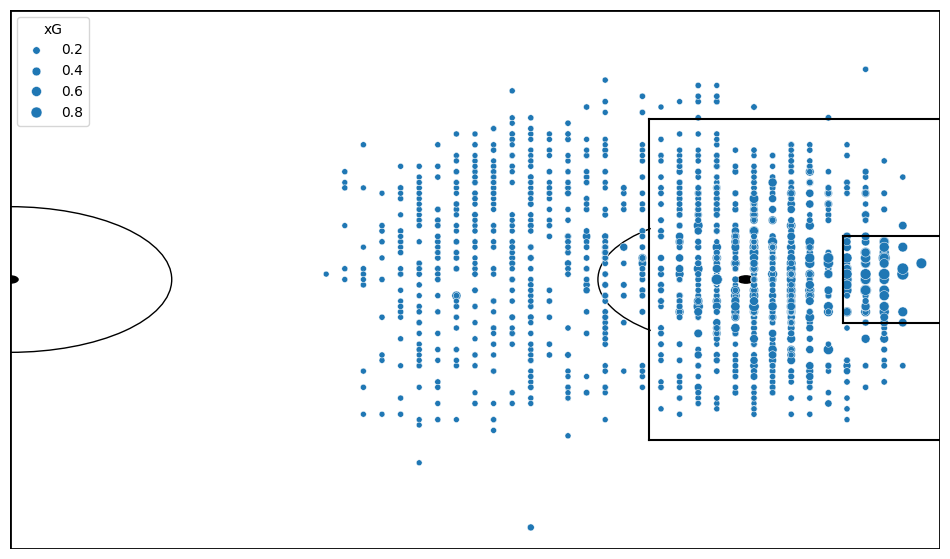

In [65]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Cristiano"], size="xG", ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

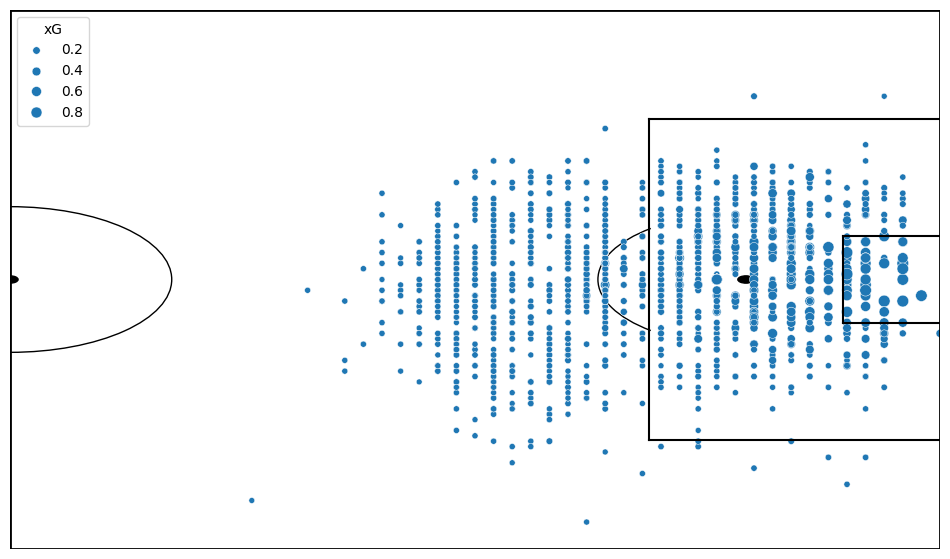

In [66]:
ax2 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Messi"], size="xG", ax=ax2)

ax2.set_xlim([x_mid, x_lims[1]])
ax2.set_ylim(y_lims)

## Plot HeatMaps

<ipython-input-67-bf5be6b9a84d>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




(0.0, 0.74)

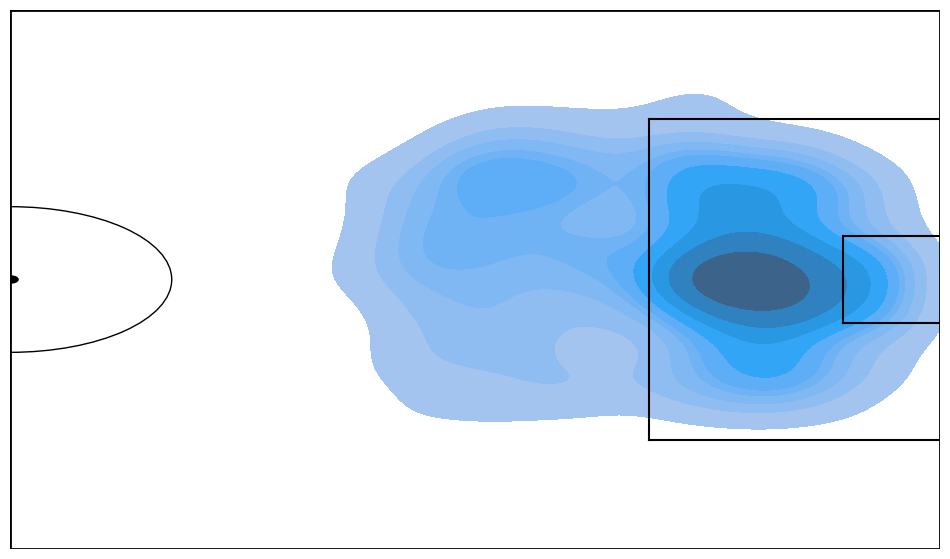

In [67]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Cristiano"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

<ipython-input-68-77cd589c8b20>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




(0.0, 0.74)

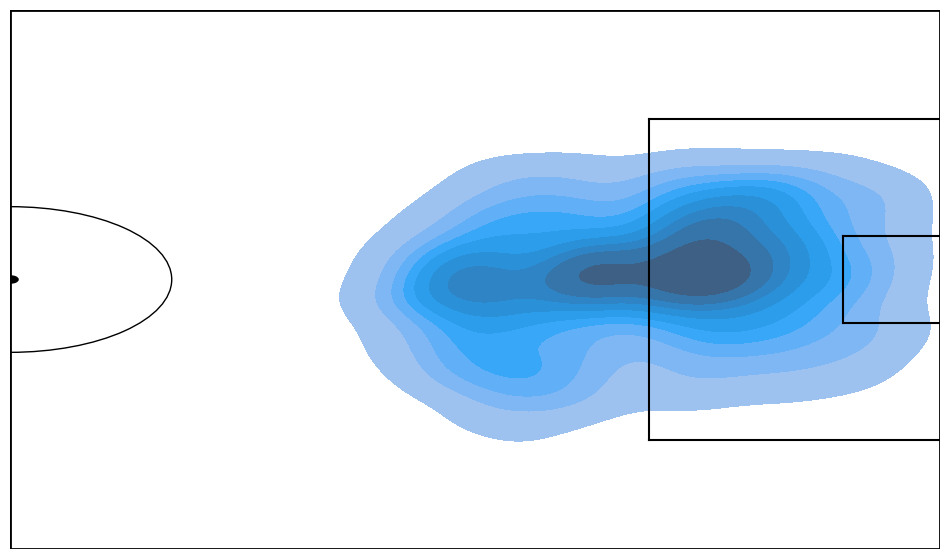

In [68]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Messi"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

# The Final Comparison

In [69]:
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,Sub,10,1,25,517,2.14,0,0.31,6,2022,Manchester United,2,0,1,2.14,2.96,0.94
1,Cristiano,FW,30,18,110,2468,17.21,3,4.42,26,2021,Manchester United,8,0,15,14.93,23.25,7.72
2,Cristiano,Sub,1,0,1,28,0.20,0,0.04,1,2021,Juventus,1,0,0,0.20,0.05,0.02
3,Cristiano,FW,33,29,167,2807,29.84,3,3.85,36,2020,Juventus,3,0,23,23.75,28.64,8.92
4,Cristiano,FWL,33,31,208,2920,29.43,5,6.07,51,2019,Juventus,3,0,19,19.53,26.55,7.22
5,Cristiano,FW,31,21,175,2692,23.32,8,5.19,48,2018,Juventus,3,0,16,18.76,21.85,7.18
6,Cristiano,FW,27,26,178,2304,27.00,5,5.52,40,2017,Real Madrid,1,0,23,24.03,31.62,9.47
7,Cristiano,FWL,29,25,162,2546,25.41,6,4.59,31,2016,Real Madrid,4,0,19,19.47,29.57,8.66
8,Cristiano,AML,36,35,227,3186,35.59,11,8.61,51,2015,Real Madrid,3,0,29,28.90,40.82,9.86
9,Cristiano,FWL,35,48,225,3103,39.31,16,13.60,76,2014,Real Madrid,5,1,38,30.39,43.61,7.52


In [70]:
radar_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().reset_index()

In [71]:
radar_df

,Player,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,265,234,1478,22571,229.45,57,52.20,366,20183,33,1,183,182.10,248.92,67.51
1,Messi,301,253,1462,25534,219.90,126,129.81,752,18162,27,0,225,190.89,364.97,149.03


In [72]:
radar_df.columns

Index(['Player', 'games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA',
       'key_passes', 'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain',
       'xGBuildup'],
      dtype='object')

In [73]:
cols_for_radar = ['goals', 'shots', 'xG',
                  'assists', 'xA', 'key_passes',
                  'npg', 'npxG', 'xGChain', 'xGBuildup']

## Radar Plot for Comparison Analysis

In [74]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Cristiano"), cols_for_radar].values.flatten(),
    theta=cols_for_radar,
    fill='toself',
    name='Cristiano'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].values.flatten(),
    theta=cols_for_radar,
    fill='toself',
    name="Messi"))
# Additional properties for the plot:
fig.update_layout(
    title="Cristiano vs Messi",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()

## Per90 Stats

In [75]:
per90Cols = ['goals', 'shots', 'xG',
             'assists', 'xA', 'key_passes',
             'npg', 'npxG', 'xGChain', 'xGBuildup']

for col in per90Cols:
    radar_df[col + "Per90"] = radar_df[col].divide(radar_df["time"]).multiply(90)

In [76]:
cols_for_radar = [i + "Per90" for i in per90Cols]

In [77]:
radar_df[cols_for_radar]

,goalsPer90,shotsPer90,xGPer90,assistsPer90,xAPer90,key_passesPer90,npgPer90,npxGPer90,xGChainPer90,xGBuildupPer90
0,0.933056,5.893403,0.914913,0.227283,0.208143,1.459395,0.729697,0.726109,0.992548,0.269191
1,0.891752,5.153129,0.775084,0.444114,0.457543,2.650584,0.793060,0.672832,1.286414,0.525288


In [78]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Cristiano"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name='Cristiano'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name="Messi"))
# Additional properties for the plot:
fig.update_layout(
    title="Cristiano vs Messi",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()

# Who Won?

The great football commentator Ray Hudson once said while describing Lionel Messi, "It's not in the statistics, you don't measure that by statistics, how do you measure someone that can balance a balloon in a wind tunnel on a needle because Messi can do that."
Carrying out this extensive data comparison of both the players while they were playing in the same league in Spain has maybe quantified both players' abilities.
After analysing and comparing the data, it would be a clear answer that for the period studied, Lionel Messi is statistically better than Cristiano Ronaldo.